### Indah Wulan Lestari
#### 2009106027

In [429]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB


In [430]:
df = pd.read_csv("bike_buyers_edit.csv")
df = df[['ID', 'Marital Status', 'Gender', 'Income',	'Children',	'Education','Occupation',	'Home Owner',	'Cars',	'Commute Distance',	'Region',	'Age',	'Purchased Bike']]

In [431]:
df.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [432]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [433]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cars'] = df['Cars'].fillna(df['Cars'].mean())
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [434]:
df.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [435]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               0
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 0
Commute Distance     0
Region               0
Age                  0
Purchased Bike       0
dtype: int64

In [436]:
df.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [437]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,4000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
2,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
3,12496,Married,Male,40000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
4,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No


## KLASIFIKASI DENGAN ALGORITMA KNN

In [438]:
X = df[['ID', 'Cars', 'Income']]
Y = df[['Purchased Bike']]

In [439]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [440]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [441]:
KNN.fit(X_train, Y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [442]:
print("Akurasi training set model KNN dengan jumlah neigbors = 5 : ",modelKNN.score(X_train, Y_train))
print("Akurasi test set model KNN dengan jumlah neighbors = 5 :", round(modelKNN.score(X_test, Y_test),2))

Akurasi training set model KNN dengan jumlah neigbors = 5 :  0.675776397515528
Akurasi test set model KNN dengan jumlah neighbors = 5 : 0.7


## Klasifikasi Dengan Linier Regression

In [443]:
from sklearn.linear_model import LinearRegression

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1007 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            996 non-null    object 
 3   Income            1007 non-null   float64
 4   Children          999 non-null    float64
 5   Education         1007 non-null   object 
 6   Occupation        1007 non-null   object 
 7   Home Owner        1003 non-null   object 
 8   Cars              1007 non-null   float64
 9   Commute Distance  1007 non-null   object 
 10  Region            1007 non-null   object 
 11  Age               1007 non-null   float64
 12  Purchased Bike    1007 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 102.4+ KB


In [445]:
X = df[['Income']]
Y = df[['Cars']]

In [446]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1)

lr = LinearRegression()

In [447]:
lr.fit(X_train, Y_train)

LinearRegression()

In [448]:
print("Nilai R-Suared Data Testing : ",round(lr.score(X_test, Y_test),2))
print("Nilai R-Suared Data Training :",lr.score(X_train, Y_train))

Nilai R-Suared Data Testing :  0.05
Nilai R-Suared Data Training : 0.20160594354496908


In [449]:
y_pred = lr.predict(X_test)

## Visualisasi

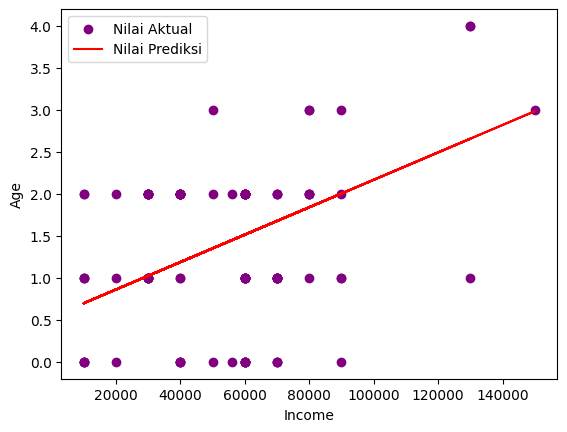

In [450]:
plt.scatter(X_test, Y_test,color='purple',label="Nilai Aktual")
plt.plot(X_test, y_pred,color="red",label="Nilai Prediksi")
plt.xlabel("Income")
plt.ylabel("Age")
plt.legend()
plt.show()